In [1]:
import pandas as pd

from portfawn.market_data import MarketData
from portfawn.portfolio import MultiPortoflio

%matplotlib inline

In [2]:
## Parameters
# market data
tickers = {"Global REIT": "REET", 
           "MSCI Emerging Markets": "EEM", 
           "Core S&P Total U.S. Stock Market": "ITOT",
           'Core U.S. Aggregate Bond': 'AGG'}

# date
start_date = "2015-01-01"
end_date   = "2020-12-30"

# portfolio
portfolio_fitness_list = ["Equal", "MSR", "MR", "MV"]
risk_free_rate = 0.00
sampling_params = {"type": "standard"}
optimization_params = {
    "scipy_params": {
        "maxiter": 1000,
        "disp": False,
        "ftol": 1e-10,
    },
    "target_return": 0.05,
    "target_risk": 0.05,
    "weight_bound": (0.05, 0.95),
}

In [3]:
## Create the market instance
market_data = MarketData(
    tickers = tickers,
    date_start = start_date,
    date_end = end_date,
    col_price = "Close",
)
data_returns = market_data.data_returns

In [4]:
multi_portfolio = MultiPortoflio(portfolio_fitness_list=portfolio_fitness_list,
                                 data_returns=data_returns,
                                 risk_free_rate=risk_free_rate,
                                 sampling_params=sampling_params,
                                 optimization_params=optimization_params,
                                )

In [5]:
multi_portfolio.generate()

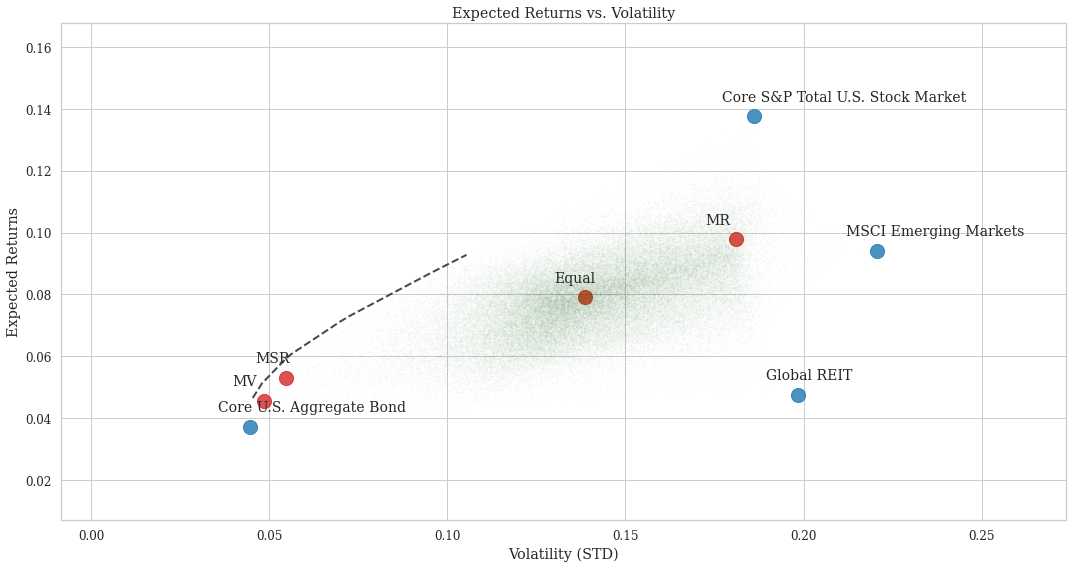

In [6]:
fig, ax = multi_portfolio.plot_portfolio()